In [2]:
#illustrate_cytokines.bubbleplot

#inherted from: #STEP05_draw_bubble_plot_V2.ipynb

library(ggplot2)
library(dplyr)
library(tidyr)
library(pheatmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in eval(expr, envir, enclos): object 'cluster_order' not found


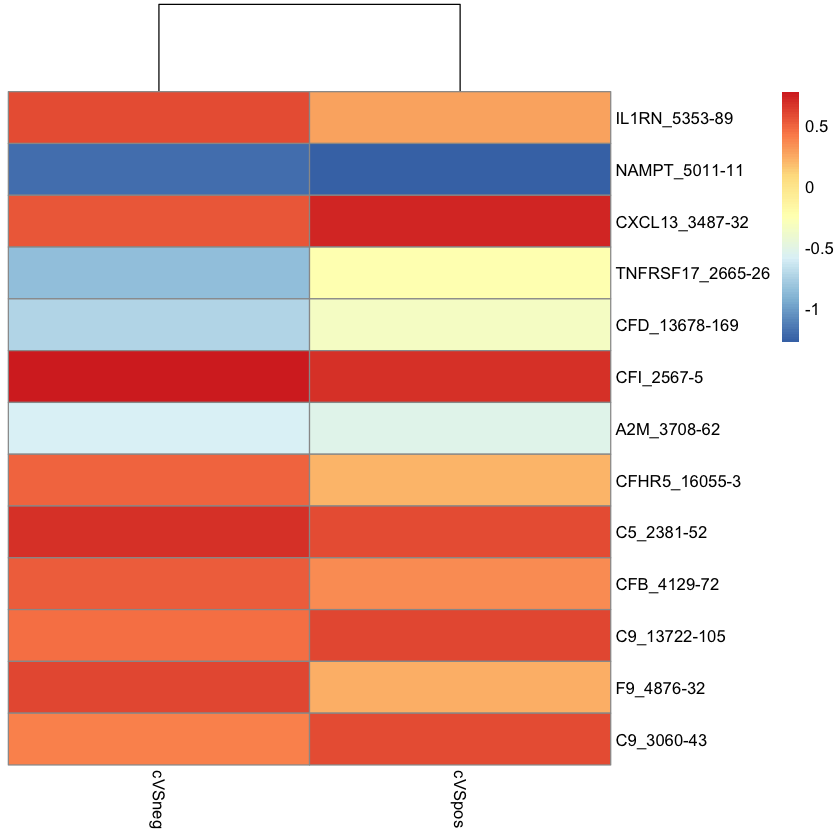

In [3]:
input_file = "../../analysis/cytokines/cytokine.bubbleplot.ready.tsv"
input_df = read.csv(input_file, sep="\t")

input_wide <- input_df %>%
  select(cytokine, condition, cohen_d) %>%
  pivot_wider(names_from = condition, values_from = cohen_d)

temp_df <- as.data.frame(input_wide)
rownames(temp_df) <- input_wide$cytokine
temp_df <- temp_df[-1]

cluster_output <- pheatmap(temp_df, cluster_rows = FALSE)
# cluster_order <- rownames(temp_df[cluster_output$tree_row[["order"]],])
input_df$cytokine <- factor(input_df$cytokine, levels = cluster_order)

In [4]:
output_pdf_label = '../../analysis/cytokines/cytokine.bubbleplot.pdf'

input_df$condition <- factor(input_df$condition, levels = unique(input_df$condition))


pdf(output_pdf_label)

output_pdf <- ggplot(input_df, aes(x=condition,y=cytokine, size=catpval, color=cohen_d)) + 
        geom_point(alpha = 0.8, stroke = 0.2) +
        scale_color_gradient2(low = "steelblue", mid = "snow2",  high= "red4",
                             limits = c(-1, 1), midpoint = 0,
                              oob = scales::squish) + 
        scale_size_continuous(range = c(0,11), 
                              breaks = c(0, 1, 5, 10)) + 
        geom_point(data = subset(input_df), 
                   aes(x = condition, y = cytokine),
                   color = "black",
                   fill = "transparent",
                   shape = 1, # Use shape = 1 for a circle
                   alpha = 0.8) +
        geom_point(data = subset(input_df, pval < 0.01 & abs(cohen_d) > 0.5), 
                   aes(x = condition, y = cytokine), 
                   shape = 8,  # Star shape
                   size = 1,   # Adjust the size of the stars
                   color = "black") +  # Star color
        scale_x_discrete(expand = c(0.1, 0.5)) +
        coord_fixed(ratio = 0.5) +
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+theme_bw()

pdf(output_pdf_label)
print (output_pdf)
dev.off()

pdf 
  2